<a href="https://colab.research.google.com/github/anagjurchinova/DataScience_2025/blob/main/Blood_Pressure_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Dataset Description

## Attributes

* id - patient identifier
* age - patient age
* height - patient height in cm
* weight - patient weight in kg
* blood sugar - patient blood sugar level
* Cholesterol - patient cholesterol level
* triglyceride - patient triglyceride level
* HDL - patient high-density lipoprotein cholesterol level
* LDL - patient low-density lipoprotein cholesterol level
* hemoglobin - patient hemoglobin level
* Urine protein - patinet protein in urine level
* serum creatinine - patient serum creatinine level
* AST - patient aspartate aminotransferase level
* ALT - patient Alanine transaminase level
* Gtp - patient Guanosine-5'-triphosphate level
* dental caries - does patient have dental caries

### Target variable
* blood - patient systolic blood pressure

In [40]:
data = pd.read_csv('/content/sample_data/blood_pressure_data (1).csv')

In [41]:
data.drop(columns=['id'], axis=1, inplace=True)
data.head()

,age,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
0,NaN,180.0,65.0,70.0,NaN,149.0,NaN,NaN,87.0,13.9,1.0,NaN,19.0,NaN,NaN,No,112.0
1,7/5/1979,150.0,50.0,88.0,92.0,219.0,LOW,NaN,137.0,13.2,NaN,0.6,26.0,17.0,NaN,No,138.0
2,11/27/1954,175.0,75.0,NaN,NaN,217.0,NORMAL,50.0,142.0,NaN,1.0,0.8,22.0,22.0,NaN,No,137.0
3,9/13/1984,160.0,NaN,NaN,100.0,160.0,HiGH,48.0,84.0,12.1,1.0,0.6,15.0,19.0,14.0,No,133.0
4,8/15/1984,170.0,NaN,68.0,99.0,176.0,LOW,NaN,96.0,13.8,1.0,0.9,33.0,NaN,11.0,No,NaN


## Blood Pressure Analysis


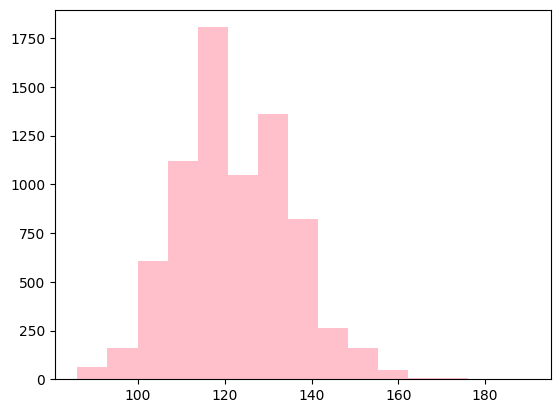

In [5]:
plt.hist(data['blood pressure'], bins=15, color='pink')
plt.show()

In [6]:
data['blood pressure'].isna().sum()

2523

In [42]:
data = data.dropna(subset=['blood pressure'], axis=0)
data['blood pressure'].isna().sum()

0

Explore the dataset using visualizations of your choice.

In [24]:
def visualize(data, columns, numerical, color):
  plt.figure(figsize=(14,4))
  for i in range(0, len(columns)):
    plt.subplot(1, len(columns), i+1)
    if numerical:
      plt.hist(data[columns[i]], bins=15, color=color)
    else:
      count = data.groupby(columns[i]).size()
      plt.bar(count.index, count, color=color)
    plt.title(columns[i])

In [43]:
from datetime import datetime

def get_age(birthdate_str):
  if(pd.isna(birthdate_str)):
    return None

  birthdate_str = str(birthdate_str)
  birthdate = datetime.strptime(birthdate_str, '%m/%d/%Y')
  today = datetime.today()
  difference_in_days = (today - birthdate).days
  age = difference_in_days // 365

  return age

In [44]:
data['age'] = data['age'].apply(get_age)

In [45]:
data['age']

,age
0,NaN
1,45.0
2,70.0
3,40.0
6,60.0
...,...
9995,NaN
9996,NaN
9997,35.0
9998,NaN


In [21]:
data.head()

,age,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
0,NaN,180.0,65.0,70.0,NaN,149.0,NaN,NaN,87.0,13.9,1.0,NaN,19.0,NaN,NaN,No,112.0
1,45.0,150.0,50.0,88.0,92.0,219.0,LOW,NaN,137.0,13.2,NaN,0.6,26.0,17.0,NaN,No,138.0
2,70.0,175.0,75.0,NaN,NaN,217.0,NORMAL,50.0,142.0,NaN,1.0,0.8,22.0,22.0,NaN,No,137.0
3,40.0,160.0,NaN,NaN,100.0,160.0,HiGH,48.0,84.0,12.1,1.0,0.6,15.0,19.0,14.0,No,133.0
4,40.0,170.0,NaN,68.0,99.0,176.0,LOW,NaN,96.0,13.8,1.0,0.9,33.0,NaN,11.0,No,NaN


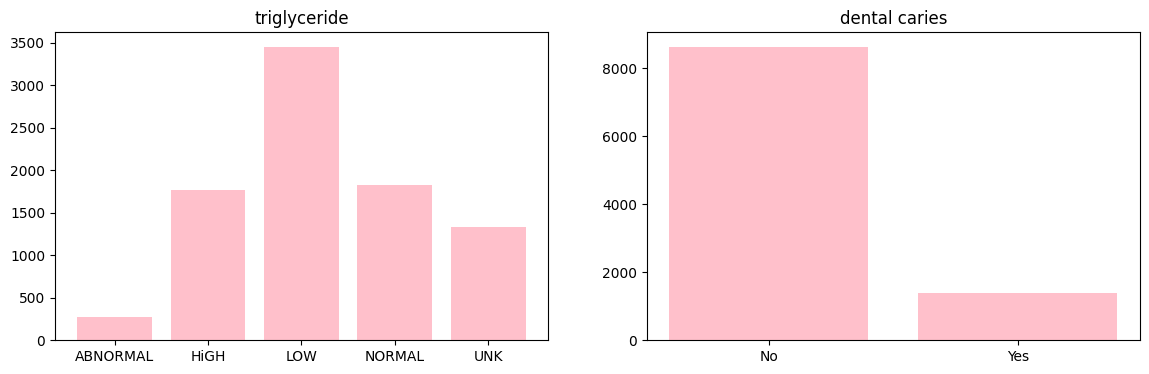

In [25]:
visualize(data, ['triglyceride', 'dental caries'],False, 'pink')

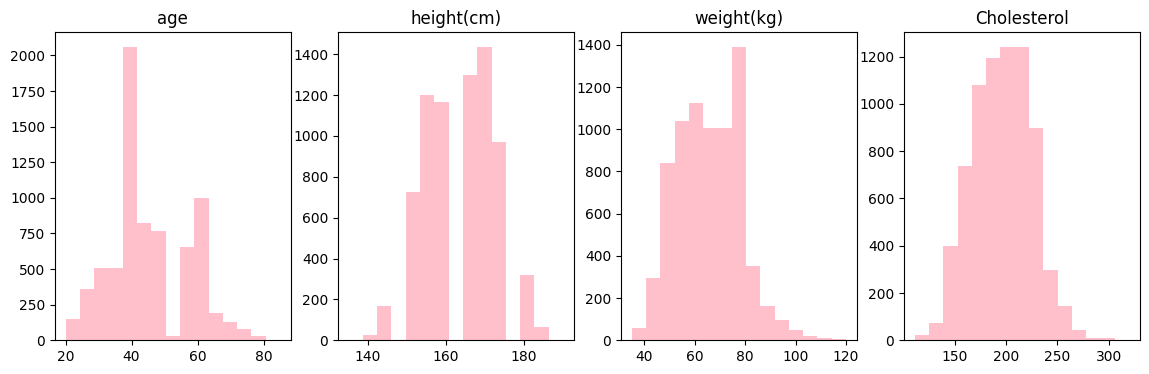

In [26]:
visualize(data, ['age', 'height(cm)', 'weight(kg)', 'Cholesterol'], True, 'pink')

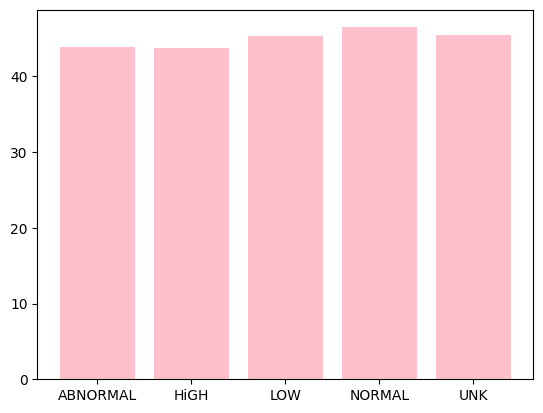

In [31]:
triglyceride_by_age = data.groupby('triglyceride')['age'].mean()
plt.bar(triglyceride_by_age.index, triglyceride_by_age, color='pink')
plt.show()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [34]:
data.isna().mean() * 100

,0
age,26.507958
height(cm),26.307343
weight(kg),25.772369
relaxation,25.545005
blood sugar,26.039856
Cholesterol,26.293968
triglyceride,13.467968
HDL,26.240471
LDL,26.293968
hemoglobin,26.227096


In [46]:
def enc_dental(x):
  if pd.isna(x):
    return None
  if type(x) == int:
    return x
  if 'yes' in x.lower():
    return 1
  if 'no' in x.lower():
    return 0

In [47]:
data['dental caries'] = data['dental caries'].apply(enc_dental)
data['dental caries']

,dental caries
0,0
1,0
2,0
3,0
6,0
...,...
9995,0
9996,0
9997,0
9998,0


In [48]:
def enc_trygl(x):
  if pd.isna(x):
    return None
  if type(x) == int:
    return x
  if 'unk' in x.lower():
    return -1
  if 'low' in x.lower():
    return 0
  if 'normal' in x.lower():
    return 1
  if 'high' in x.lower():
    return 2
  if 'abnormal' in x.lower():
    return 3

In [49]:
data['triglyceride'] = data['triglyceride'].apply(enc_trygl)
data['triglyceride']

,triglyceride
0,NaN
1,0.0
2,1.0
3,2.0
6,0.0
...,...
9995,1.0
9996,1.0
9997,NaN
9998,2.0


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

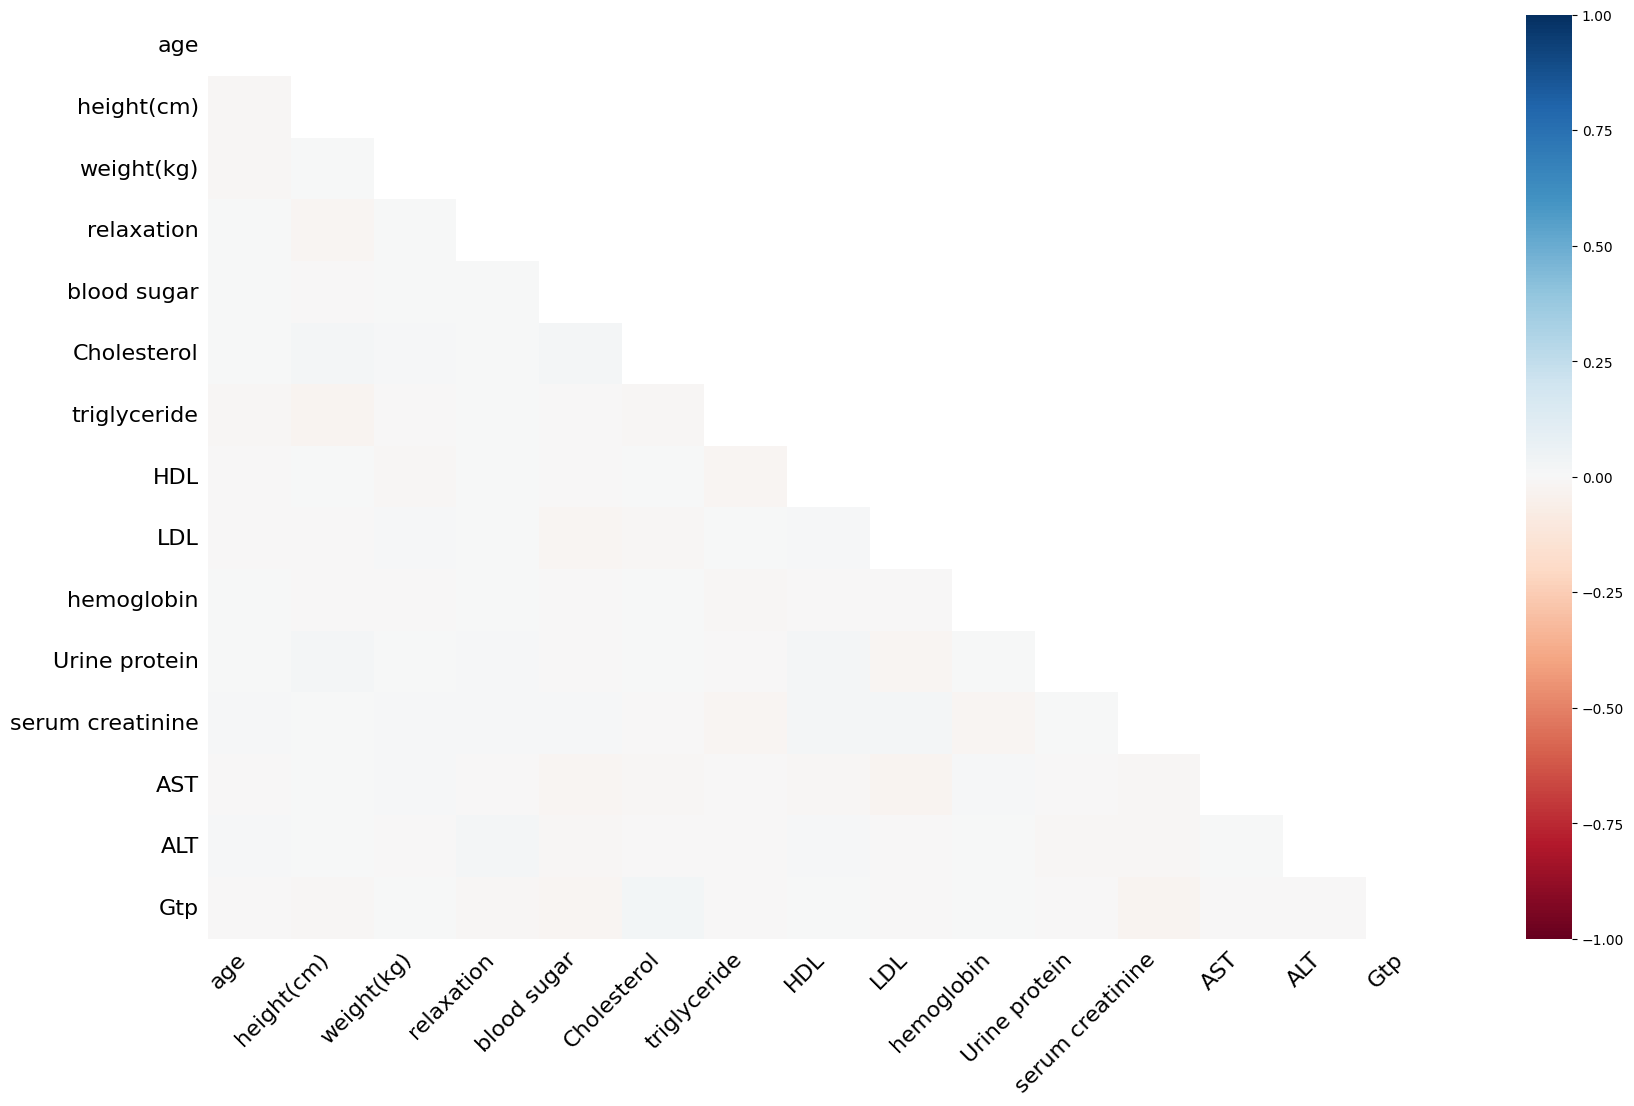

In [50]:
msno.heatmap(data)
plt.show()

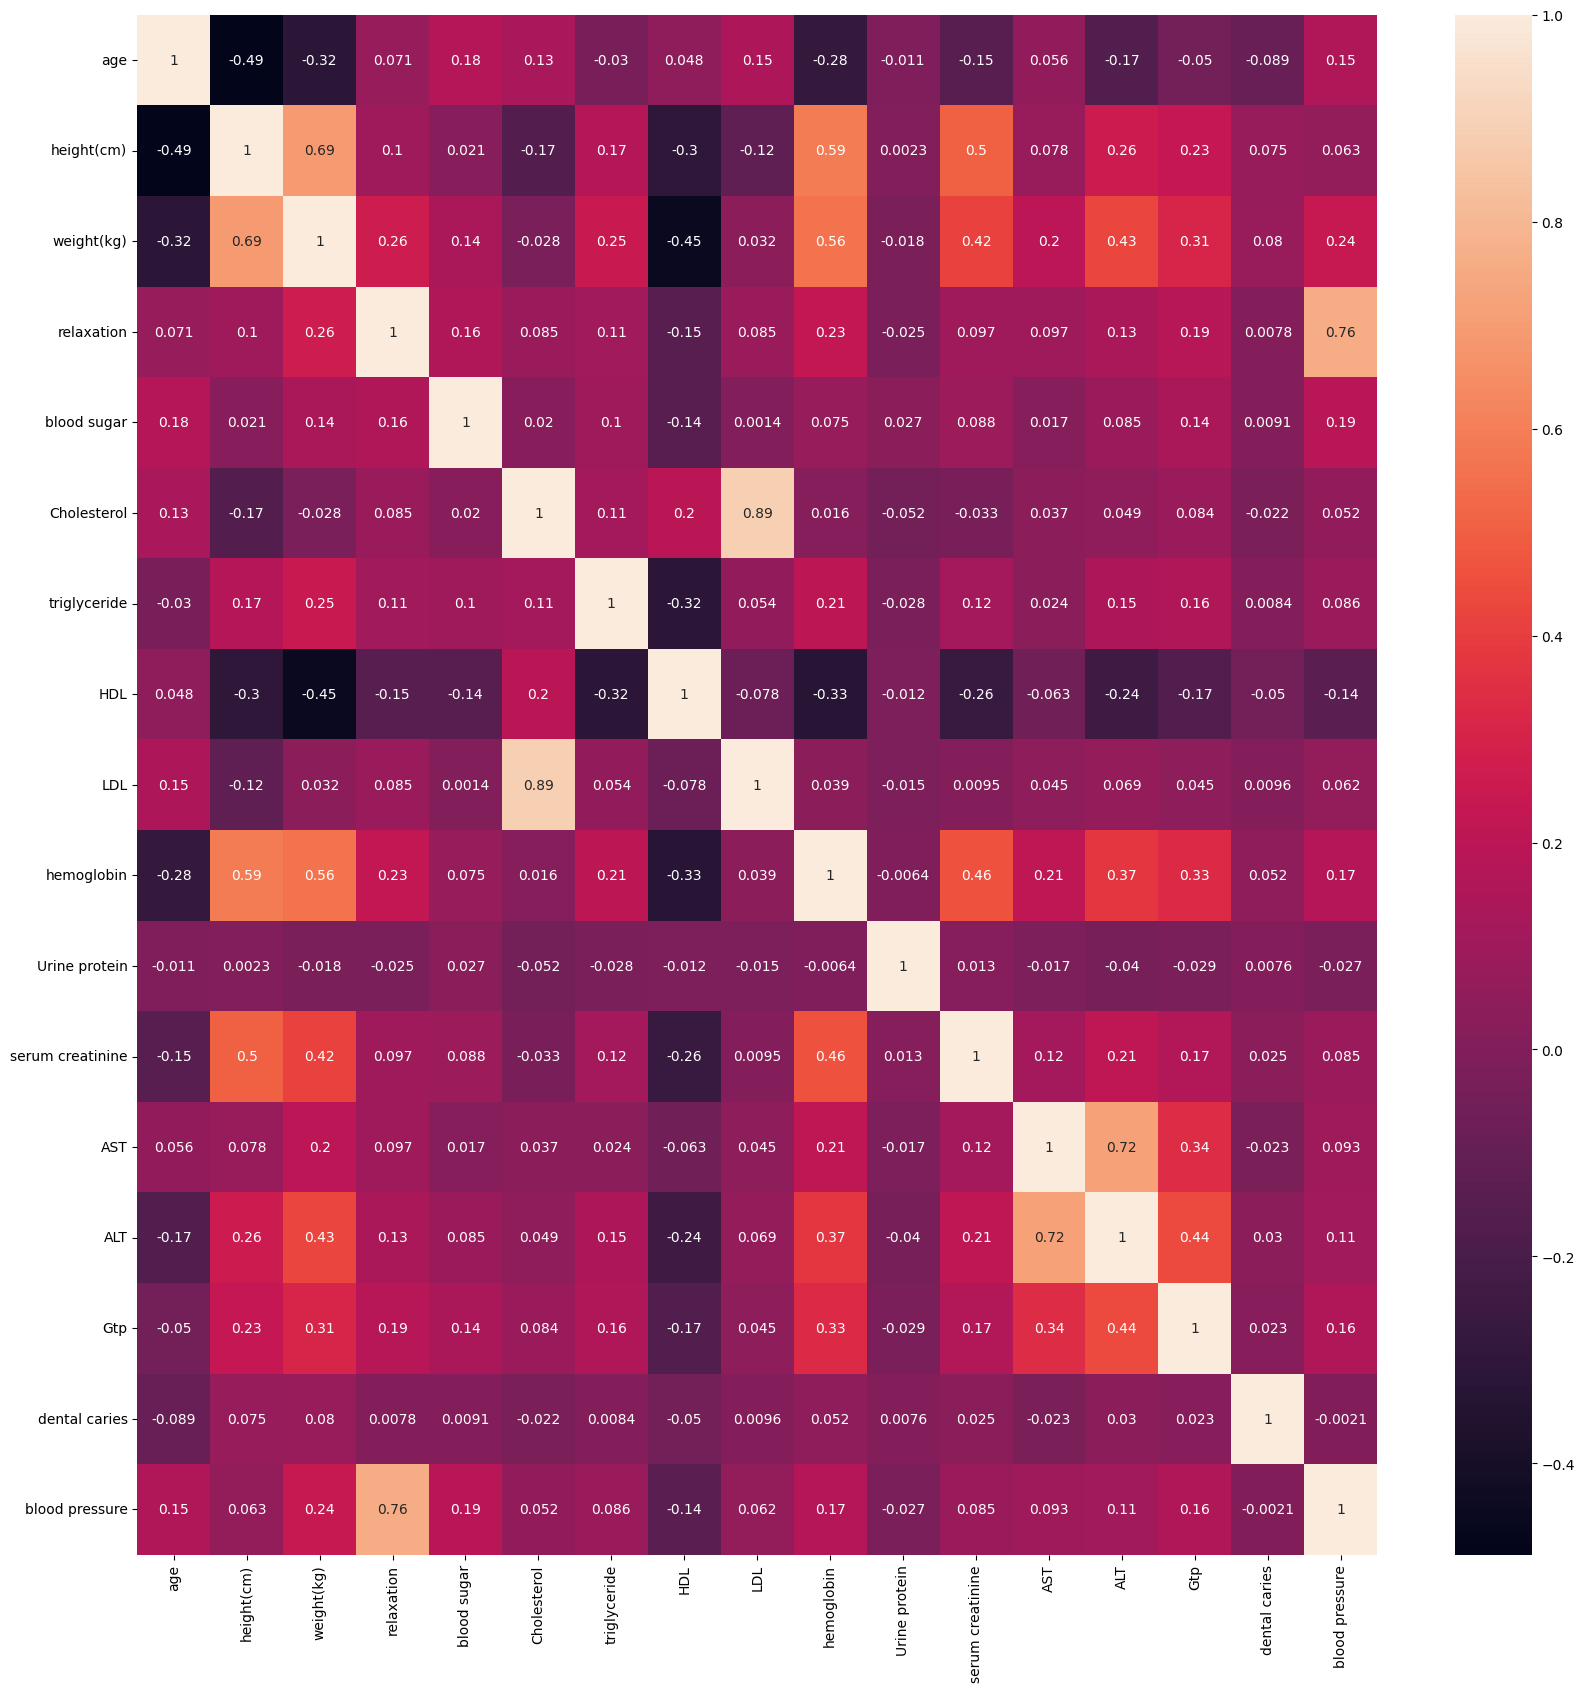

In [51]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True)
plt.show()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [52]:
def impute_knn(data, columns, n_neighbors=5):
  scaler = MinMaxScaler()
  scaled_data = scaler.fit_transform(data[columns])
  knn_imputer = KNNImputer(n_neighbors=5)
  imputed_data = knn_imputer.fit_transform(scaled_data)
  data[columns] = imputed_data

In [54]:
impute_knn(data, ['AST', 'ALT'])
impute_knn(data, ['Cholesterol', 'LDL'])
impute_knn(data, ['relaxation', 'blood pressure'])
impute_knn(data, ['weight(kg)', 'height(cm)', 'hemoglobin'])

In [55]:
data.isna().mean() * 100

,0
age,26.507958
height(cm),0.000000
weight(kg),0.000000
relaxation,0.000000
blood sugar,26.039856
Cholesterol,0.000000
triglyceride,13.467968
HDL,26.240471
LDL,0.000000
hemoglobin,0.000000


In [58]:
def impute(data, columns, strategy):
  imputer = SimpleImputer(strategy = strategy)
  for column in columns:
    data[column] = imputer.fit_transform(data[[column]]).flatten()

In [59]:
impute(data, ['triglyceride'], 'most_frequent')

In [60]:
impute(data, ['age'], 'median')

In [61]:
impute_knn(data, ['Gtp', 'serum creatinine', 'Urine protein', 'HDL', 'blood sugar'])

In [62]:
data.isna().mean() * 100

,0
age,0.0
height(cm),0.0
weight(kg),0.0
relaxation,0.0
blood sugar,0.0
Cholesterol,0.0
triglyceride,0.0
HDL,0.0
LDL,0.0
hemoglobin,0.0


## Feature Preprocessing


Preprocess the features to make them ready for using the model

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( data[data.columns[:-1]],  data['blood pressure'], test_size=0.2)

## Model comparison with cross-validation

Train two models: XGBoost and RandomForest for predicting the target variable. Use 5-fold cross-validation to evaluate the performance of the models and compare them using adrquate metrics.

# Cross-Validation

In [68]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    "objective" : ["reg:linear"],
    'cosample_bytree' : [0.2, 0.3, 0.4, 0.5],
    'learning_rate' : [0.001, 0.01, 0.1],
    'max_depth' : [4, 5, 6, 7],
    'alpha' : [2, 4, 6, 10]
}
model = XGBRegressor()
grid_search = GridSearchCV(
    param_grid=param_grid,
    estimator=model,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, Y_train)

print(f'Best params: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best params: {'alpha': 2, 'cosample_bytree': 0.2, 'learning_rate': 0.1, 'max_depth': 5, 'objective': 'reg:linear'}
Best score: 0.6528572709003673


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:42:20] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:42:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "cosample_bytree" } are not used.

  warnings.warn(smsg, UserWarning)


Assess the performance of the models by using different metrics provided by the `scikit-learn` library.

In [71]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

model = grid_search.best_estimator_
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print("Mean Absolute Error : " + str(np.sqrt(mean_absolute_error(predictions, Y_test))))
print(r2_score(Y_test, predictions))

Mean Absolute Error : 0.23045197347347302
0.6955928751649955


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:51:04] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:51:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "cosample_bytree" } are not used.

  warnings.warn(smsg, UserWarning)
